## Class Notes

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2023-05-26 10:28:27.346257: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 10:28:27.834006: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 10:28:27.836156: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 10:28:31.066712: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
circles = pd.DataFrame({
    'x0': X[:,0], 'x1': X[:,1], 'label':y
})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


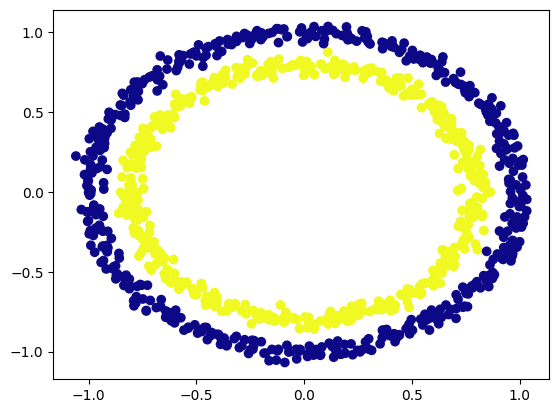

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='plasma')

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 4ms/step - loss: 0.6917 - accuracy: 0.5337
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5675
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.5375
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.5688
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6552 - accuracy: 0.6037
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.6712
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6165 - accuracy: 0.7200
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5895 - accuracy: 0.7138
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.7462
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.7975
Epoch 11/20
25/25 [

In [36]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.9900


[0.11252979934215546, 0.9900000095367432]

Text(0.5, 0, 'epoch')

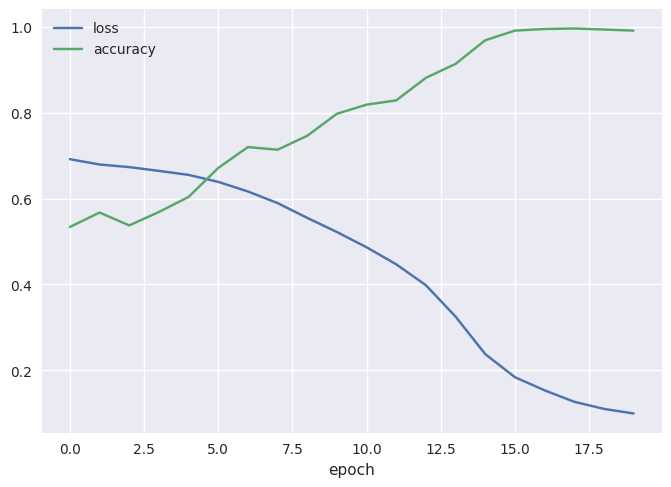

In [37]:
pd.DataFrame(history.history).plot()
plt.style.use('seaborn-v0_8')
plt.xlabel('epoch')

In [38]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 996us/step
doing binary classifcation...


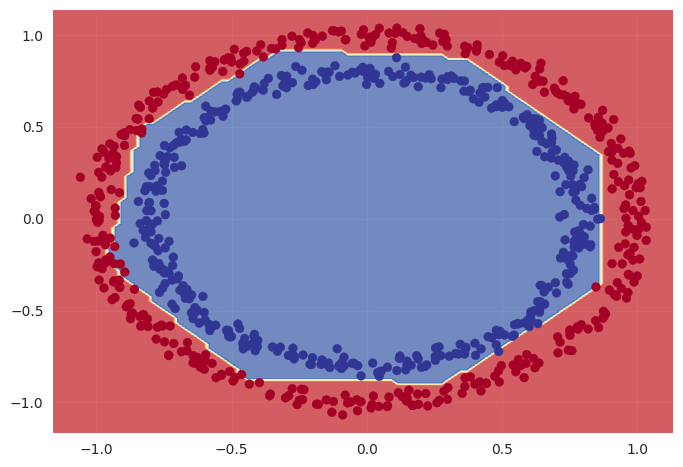

In [39]:

plot_decision_boundary(model, X_train, y_train)